<a href="https://colab.research.google.com/github/SayaliSPotdar/OIBSIP/blob/main/Car_Price__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/InternshipDatasets/CarPrice.csv')

# **Check data**

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **Check Columns**

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# **Drop Column which are not Required**

In [ ]:
df.drop(columns=['car_ID','symboling','CarName','fuelsystem'],axis=1,inplace=True)

In [ ]:
df.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0


# **Clean Data,Check for null values. duplicate values**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.duplicated().sum()

2

# **Drop Duplicate Values**

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

# **Check Row and Columns**

In [ ]:
df.shape

(203, 22)

# **Check datatype**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          203 non-null    object 
 1   aspiration        203 non-null    object 
 2   doornumber        203 non-null    object 
 3   carbody           203 non-null    object 
 4   drivewheel        203 non-null    object 
 5   enginelocation    203 non-null    object 
 6   wheelbase         203 non-null    float64
 7   carlength         203 non-null    float64
 8   carwidth          203 non-null    float64
 9   carheight         203 non-null    float64
 10  curbweight        203 non-null    int64  
 11  enginetype        203 non-null    object 
 12  cylindernumber    203 non-null    object 
 13  enginesize        203 non-null    int64  
 14  boreratio         203 non-null    float64
 15  stroke            203 non-null    float64
 16  compressionratio  203 non-null    float64
 1

# **Check Statastical Values**

In [ ]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,98.806404,174.214286,65.928571,53.754680,2560.571429,127.231527,3.333005,3.254877,10.158719,104.305419,5121.428571,25.197044,30.719212,13337.633828
std,6.030353,12.284573,2.145470,2.436869,520.717792,41.716874,0.270160,0.314998,3.987270,39.657386,477.873206,6.561257,6.901354,8003.995399
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.150000,52.000000,2179.500000,97.500000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7793.500000
50%,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16509.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# **Corelation**

In [ ]:
df.corr()

<ipython-input-90-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874344,0.793538,0.585640,0.774721,0.566513,0.483901,0.163052,0.247484,0.351226,-0.356268,-0.470099,-0.543555,0.575127
carlength,0.874344,1.000000,0.839592,0.482457,0.876857,0.681101,0.600004,0.133155,0.154439,0.552318,-0.280096,-0.673738,-0.706731,0.680799
carwidth,0.793538,0.839592,1.000000,0.270516,0.865861,0.733554,0.554055,0.185611,0.178154,0.640413,-0.214045,-0.643682,-0.677737,0.757709
carheight,0.585640,0.482457,0.270516,1.000000,0.287119,0.058049,0.158481,-0.053710,0.258489,-0.116022,-0.314128,-0.044581,-0.102404,0.110986
curbweight,0.774721,0.876857,0.865861,0.287119,1.000000,0.849584,0.644433,0.170993,0.148592,0.750594,-0.260707,-0.758422,-0.798083,0.834216
enginesize,0.566513,0.681101,0.733554,0.058049,0.849584,1.000000,0.580263,0.204990,0.026060,0.809792,-0.239998,-0.653788,-0.677222,0.873367
boreratio,0.483901,0.600004,0.554055,0.158481,0.644433,0.580263,1.000000,-0.054518,0.000463,0.572810,-0.248098,-0.585261,-0.586657,0.549457
stroke,0.163052,0.133155,0.185611,-0.053710,0.170993,0.204990,-0.054518,1.000000,0.187684,0.080902,-0.069564,-0.041510,-0.043431,0.080789
compressionratio,0.247484,0.154439,0.178154,0.258489,0.148592,0.026060,0.000463,0.187684,1.000000,-0.206002,-0.434329,0.325952,0.266871,0.065324
horsepower,0.351226,0.552318,0.640413,-0.116022,0.750594,0.809792,0.572810,0.080902,-0.206002,1.000000,0.135528,-0.800790,-0.769546,0.808089


<ipython-input-91-fe0fae7dc149>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


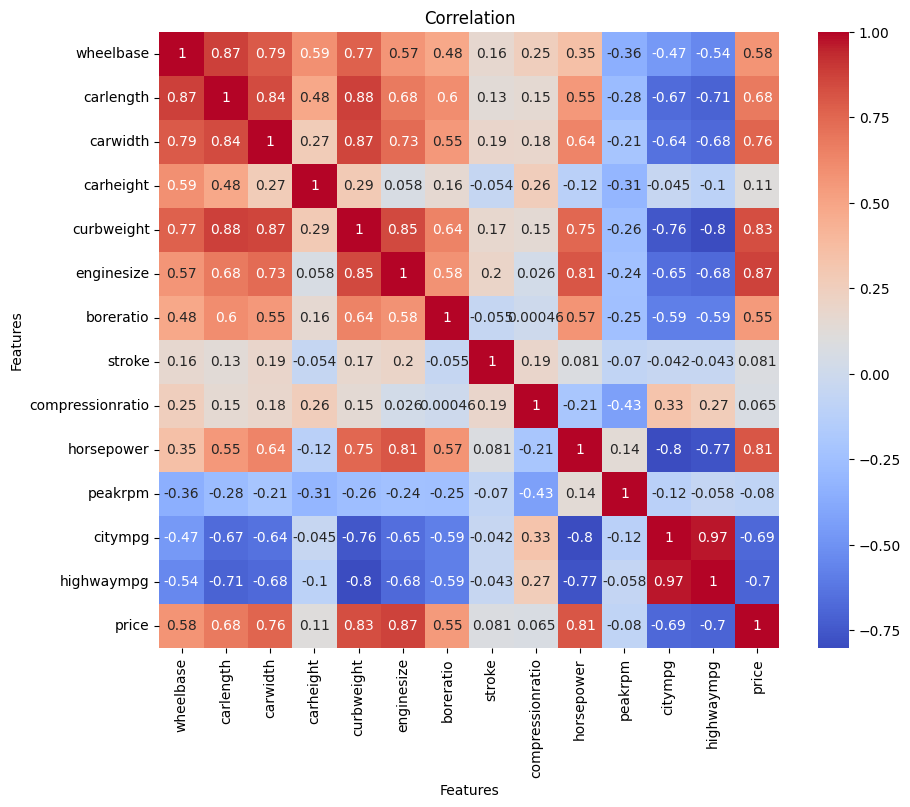

In [ ]:
cm = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation')
plt.show()


# **Check Value counts**

In [ ]:
df['fueltype'].value_counts()

gas       183
diesel     20
Name: fueltype, dtype: int64

In [ ]:
df['aspiration'].value_counts()

std      167
turbo     36
Name: aspiration, dtype: int64

In [ ]:
df['doornumber'].value_counts()

four    114
two      89
Name: doornumber, dtype: int64

In [ ]:
df['carbody'].value_counts()

sedan          96
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [ ]:
df['drivewheel'].value_counts()

fwd    118
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [ ]:
df['enginelocation'].value_counts()

front    200
rear       3
Name: enginelocation, dtype: int64

In [ ]:
df['enginetype'].value_counts()

ohc      146
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [ ]:
df['cylindernumber'].value_counts()

four      157
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [ ]:
df['fueltype']=df['fueltype'].map({'gas':0 , 'diesel':1}).astype('int')
df['aspiration']=df['aspiration'].map({'std':0, 'turbo':1}).astype('int')
df['doornumber']=df['doornumber'].map({'four':0,'two':1}).astype('int')
df['carbody']=df['carbody'].map({'sedan':0,'hatchback':1,'wagon':2, 'hardtop':3,'convertible':4}).astype('int')
df['drivewheel']=df['drivewheel'].map({'fwd':0,'rwd':1,'4wd':2}).astype('int')
df['enginelocation']=df['enginelocation'].map({'front':0,'rear':1}).astype('int')
df['enginetype']=df['enginetype'].map({'ohc':0, 'ohcf':1, 'ohcv':2 ,'dohc' :3, 'l':4, 'rotor':5, 'dohcv':6}).astype('int')
df['cylindernumber']=df['cylindernumber'].map({'four':0, 'six':1, 'five':2  , 'eight':3, 'two':4,  'three':5, 'twelve':6}).astype('int')


In [ ]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,1,4,1,0,88.6,168.8,64.1,48.8,...,0,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,1,4,1,0,88.6,168.8,64.1,48.8,...,0,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,1,1,1,0,94.5,171.2,65.5,52.4,...,1,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,0,0,0,0,0,99.8,176.6,66.2,54.3,...,0,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,0,0,0,2,0,99.4,176.6,66.4,54.3,...,2,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          203 non-null    int64  
 1   aspiration        203 non-null    int64  
 2   doornumber        203 non-null    int64  
 3   carbody           203 non-null    int64  
 4   drivewheel        203 non-null    int64  
 5   enginelocation    203 non-null    int64  
 6   wheelbase         203 non-null    float64
 7   carlength         203 non-null    float64
 8   carwidth          203 non-null    float64
 9   carheight         203 non-null    float64
 10  curbweight        203 non-null    int64  
 11  enginetype        203 non-null    int64  
 12  cylindernumber    203 non-null    int64  
 13  enginesize        203 non-null    int64  
 14  boreratio         203 non-null    float64
 15  stroke            203 non-null    float64
 16  compressionratio  203 non-null    float64
 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
X = np.array(df[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
             'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']])

In [ ]:
y=np.array(df['price'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 12389573.859837888
R2 Score: 0.8578772886042108


In [ ]:
#features=[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
#            'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']])

In [ ]:
features=np.array([[0	,0,	1,	4,	1,	0,	88.6,	168.8,	64.1,	48.8, 2548, 3,	0,	130,	3.47,	2.68,	9.0,	111,	5000,	21,	27]])

In [ ]:
print(model.predict(features))

[10840.54955264]


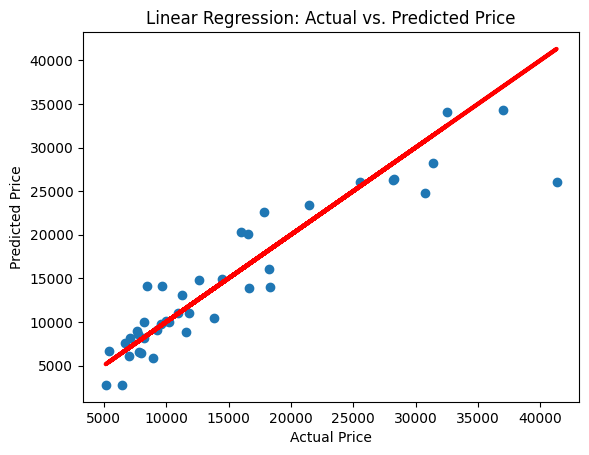

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linewidth=3)
plt.title('Linear Regression: Actual vs. Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()